# Trends

We are going to do some re-importing of texts here by year. The first time around we are going to do the combined dataset and look for overall trends, and then we will follow that up by loading both the `only` and `plus` datasets separately to see if there are any differences worth noting. Our goal here is to see what words trend not only to learn about TED talks as a developing collection of events but it might also be possible to compare the trends glimpsed here against either trends from the BYU corpus or Google Trends itself.

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Data-Load" data-toc-modified-id="Imports-and-Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Data Load</a></span></li><li><span><a href="#Working-with-the-Years" data-toc-modified-id="Working-with-the-Years-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Working with the Years</a></span></li></ul></div>

## Imports and Data Load

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

For whatever reason, the changing of figure size only ever works for me after I have created the first graph. For that reason, it is on a separate line so that I can run it later:

In [10]:
plt.rcParams["figure.figsize"] = (20,10)

In [6]:
df = pd.read_csv('../output/TEDall_years.csv', index_col=0)
df.shape
df.head()

,public_url,event,published,text,year
0,https://www.ted.com/talks/al_gore_on_averting_...,TED2006,6/27/06,"Thank you so much, Chris. And it's truly a g...",2006
1,https://www.ted.com/talks/david_pogue_says_sim...,TED2006,6/27/06,"(Music: ""The Sound of Silence,"" Simon & Garf...",2006
2,https://www.ted.com/talks/majora_carter_s_tale...,TED2006,6/27/06,If you're here today — and I'm very happy th...,2006
3,https://www.ted.com/talks/ken_robinson_says_sc...,TED2006,6/27/06,Good morning. How are you? (Laughter) ...,2006
4,https://www.ted.com/talks/hans_rosling_shows_t...,TED2006,6/27/06,"About 10 years ago, I took on the task to te...",2006


## Working with the Years

Okay, now the data analysis begins with us sorting out the talks into year bins where we can count terms and then determine the best way to find out which words, if any, show notable dynamism. 

And we are going to have to decide how to define dynamism: Google Trends has a formula for word frequency

```
                   count of word(1)
                  ------------------
             count of all words in a year
```

But one searches on that and it graphs. I think we want to find some way to arrive at some algorithmic "flagging" of terms with particular kinds of dynamics.

Our hypothesis here is that TED events will likely have some topicality, and so we will see one event dynamism, but we also probably want to try to find words that rise and fall over two years or more.

We can make a quick check to see how many talks we have for each year. As `df.groupby('year').size()` reveals, the first year for which we have a substantial number of talks is 2002. We can probably safely start our analysis there.  

In [8]:
df.groupby('year').size()

year
1984      1
1990      1
1994      1
1998      6
2001      3
2002     28
2003     34
2004     31
2005     62
2006     43
2007     92
2008     56
2009    155
2010    162
2011    150
2012    146
2013    162
2014    154
2015    149
2016    145
2017    166
dtype: int64

We can also, somewhat gratuitously, visualize this:

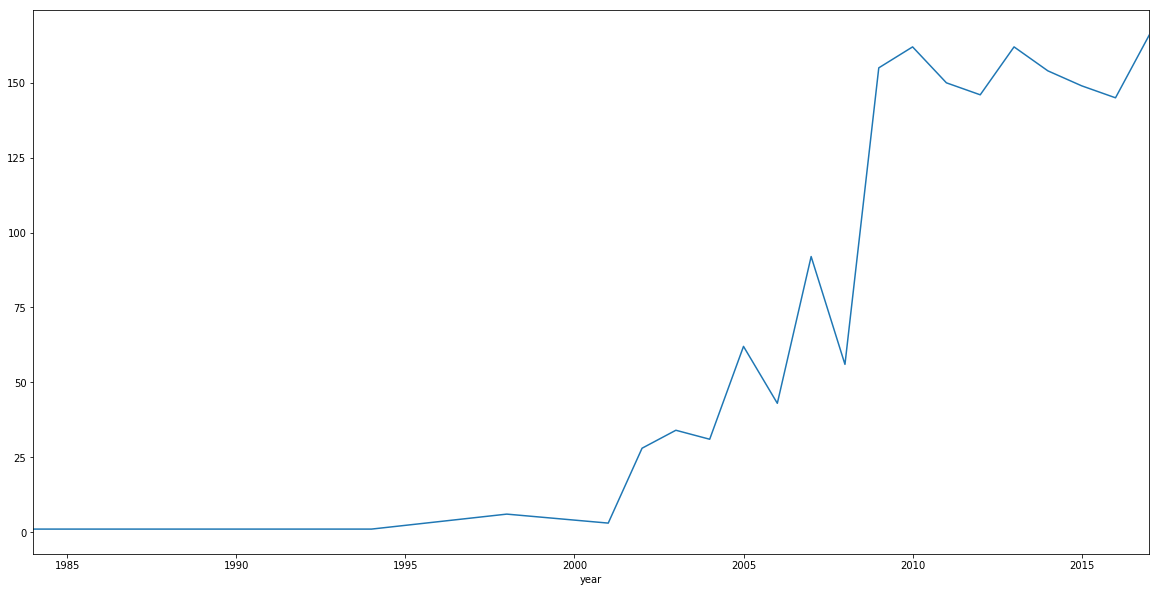

In [11]:
df.groupby('year').size().plot()

Our next step is to filter by year, so maybe choosing a year like 1998 with 6 talks might be a good place to begin building our code:

In [14]:
year_1998 = df.loc[df['year'] == 2001]
year_1998.head()

,public_url,event,published,text,year
262,https://www.ted.com/talks/eva_zeisel_on_the_pl...,TED2001,12/9/08,So I understand that this meeting was planne...,2001
308,https://www.ted.com/talks/john_wooden_on_the_d...,TED2001,3/26/09,I coined my own definition of success in 193...,2001
310,https://www.ted.com/talks/c_k_williams_reads_p...,TED2001,3/30/09,I thought I would read poems I have that rel...,2001


What we want to do is count all the words in a given year and then be able to compare across years. So, what we want is something like this:

1. count all the words in a year
2. divide every word by the total count to assign it its frequency for the year[^1]
3. create a pandas dataframe (?) that looks like this:

```
| word  | 2002  | 2003  | 2004  |  ...  |
|-------|-------|-------|-------|-------|
| other | 0.007 | 0.007 |0.0008 | 0.001 |
| stuff | 0.001 | 0.002 | 0.002 | 0.003 |
```

So, do we create 16 lists, each with all the words for a year, and then write date back into a dataframe or is there a way to do this within **pandas**? (I'm trying to grok "the pandas way" as much as possible.)

[^1]: This is how Google Trends does it. See: Younes, N., & Reips, U. D. (2019). Guideline for improving the reliability of Google Ngram studies: Evidence from religious terms. PloS one, 14(3), e0213554. doi:10.1371/journal.pone.0213554.

In [15]:
y1998 = df.loc[df['year'] == 2001].text.tolist()

The best way to do this, I think, is to feed a function or a for loop a list of years, filter the dataframe by year, and create a giant list of words for each year.

In [31]:
# At the heart of this is a lambda function, which allows us to apply a filter 
# the list and sorted functions add a lot of parentheses.
years = sorted(list(filter(lambda year: year > 2001, df.year.unique())))
print(years)

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [34]:
for year in years[0:2]:
    year = df.loc[df['year'] == 2001].text.tolist()

SyntaxError: can't assign to operator (<ipython-input-34-027d21fa084b>, line 2)